In [4]:
# https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment/downloads/Sentiment.csv/notebook

import pandas as pd
import seaborn as sns
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Softmax,Embedding,LSTM,SpatialDropout1D
from sklearn.model_selection import train_test_split


In [6]:
data = pd.read_csv('C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Sentiment.csv')
data = data[['text','sentiment']]

In [8]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


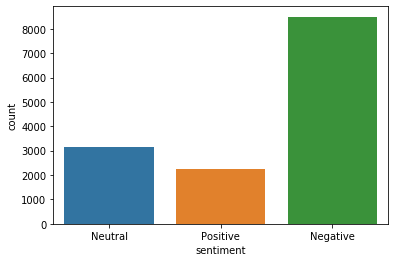

In [9]:
sns.countplot(data['sentiment'])

In [10]:
# Consider only 'Postive' and 'Negative' sentiment
data = data[data.sentiment != 'Neutral']

In [12]:
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Remove 'rt' 
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

In [26]:
data['text'][1]

'  scottwalker didnt catch the full gopdebate last night here are some of scotts best lines in 90 seconds walker16 httptcozsff'

In [15]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [19]:
X

array([[   0,    0,    0, ..., 1324, 1409,  743],
       [   0,    0,    0, ...,  233,  724,   17],
       [   0,    0,    0, ...,  207,  371,  670],
       ...,
       [   0,    0,    0, ...,   72,   65,    3],
       [   0,    0,    0, ..., 1022, 1423,   74],
       [   0,    0,    0, ...,  197,    3,  723]])

In [25]:
X.shape  # 10729 Samples and 28 is Max input fature

(10729, 28)

In [75]:
embed_dim = 128
lstm_out = 196

In [76]:
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 28, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7188, 28) (7188, 2)
(3541, 28) (3541, 2)


In [78]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
 - 45s - loss: 0.4378 - acc: 0.8140
Epoch 2/7
 - 46s - loss: 0.3239 - acc: 0.8625
Epoch 3/7
 - 48s - loss: 0.2819 - acc: 0.8824
Epoch 4/7
 - 49s - loss: 0.2573 - acc: 0.8961
Epoch 5/7
 - 47s - loss: 0.2286 - acc: 0.9075
Epoch 6/7
 - 45s - loss: 0.2071 - acc: 0.9158
Epoch 7/7
 - 46s - loss: 0.1834 - acc: 0.9275


In [79]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

 - 2s - loss: 0.4408 - acc: 0.8368
score: 0.44
acc: 0.84
